In [1]:
using WAV;
using DSP;
using FFTW;
using Statistics;
using Plots;
using CuArrays;
include("nnmf2.jl");

In [4]:
sample_rate, V_mag, V_phase, audio_stft, max_freq_ind = 
audio_to_V("data/tetris_piano_poly.wav");

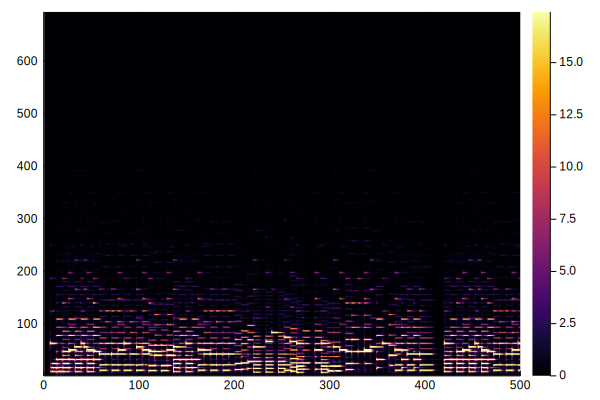

In [5]:
q = quantile(vec(V_mag),0.99);
heatmap(V_mag, clims = (0,q),xlims=(0,500))

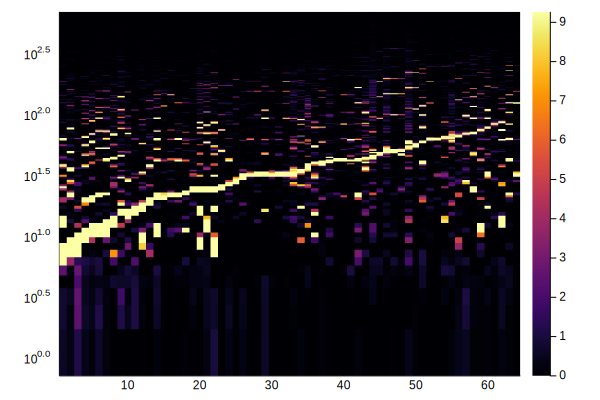

In [8]:
num_components = 64;
W, H = nnmf(V_mag,num_components,1024);

f_max = [findmax(W[:,i])[2] for i in 1:size(W,2)];
f_max_ind = sortperm(f_max);
W = W[:,f_max_ind];
H = H[f_max_ind,:];

q = quantile(vec(W),0.99);
heatmap(W, clims = (0,q), yscale=:log10)

In [9]:
split = floor(Int64,num_components/2);
ind1 = 1:split
ind2 = (split+1):num_components;
V1 = W[:,ind1]*H[ind1,:];
V2 = W[:,ind2]*H[ind2,:];
V_to_audio("test1.wav",sample_rate, V1, V_phase, audio_stft, max_freq_ind);
V_to_audio("test2.wav",sample_rate, V2, V_phase, audio_stft, max_freq_ind);